In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [2]:
fname = "200623//200623_Bi2Te30617_seebeck_1.txt"
df = pd.read_csv(fname, sep = " ", header = 0)

In [17]:
df['dVsamp'].min()

-0.0012792416712000001

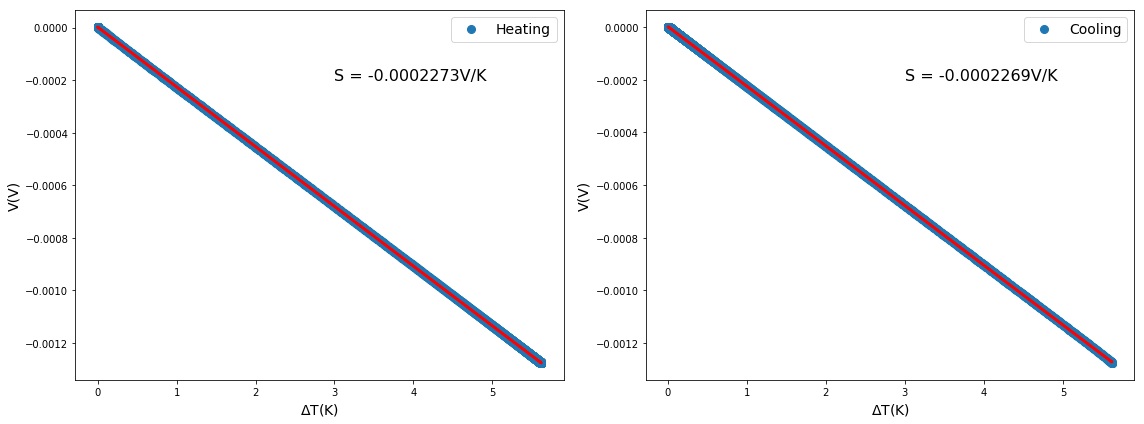

In [49]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
dTl = df['Tl'] - df['Tl'].iloc[0]
dTr = df['Tr'] - df['Tr'].iloc[0]
df['dVsamp'] = df['Vsamp'] - df['Vsamp'].iloc[0]
df['delT'] = dTl - dTr

fig, axs = plt.subplots(1,2, figsize = (16,6))
mask = df['dVsamp'].idxmin()
x = df['delT'][0 : mask]
y = df['Vsamp'][0 : mask]
m1, b1 = np.polyfit(x, y, 1)
axs[0].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
axs[0].plot(x, np.polyval([m1,b1], x), color = 'red', linewidth = 3)
axs[0].text(3, -0.0002, f'S = {round(m1,7)}V/K', fontsize = 16)
axs[0].set_xlabel(r'$\Delta$T(K)', fontsize = 14)
axs[0].set_ylabel('V(V)', fontsize = 14)
axs[0].legend(fontsize = 14)

x = df['delT'][mask:]
y = df['Vsamp'][mask:]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(x, np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(3, -0.0002, f'S = {round(m2,7)}V/K', fontsize = 16)
axs[1].set_xlabel(r'$\Delta$T(K)', fontsize = 14)
axs[1].set_ylabel('V(V)', fontsize = 14)
axs[1].legend(fontsize = 14)

plt.tight_layout()

fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 300)